# Pre Notebook
---
Something about how to set up a catalog that is compatable with the fitting code but can have the users idk flush this part out more later with instructions and stuff

In [23]:
# loading in packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii, fits
import os

# defining pathways
hpath = os.getcwd()

# pathway for 1D spectra on DEIMOS website
deimos_path1D = 'https://irsa.ipac.caltech.edu/data/COSMOS/spectra/deimos/spec1d_fits/'
deimos_path2d = 'https://irsa.ipac.caltech.edu/data/COSMOS/spectra/deimos/spec2d/'

print('Home Path:',hpath)

Home Path: /Users/felix/github/AutoQSOFit


### First begining by reading in our example catalog:
This cell only works if you have the file `deimos_catalogue.csv` in your current directory.

In [27]:
# loading in the catalog we will be using
catalog = pd.read_csv(hpath+'/example_data/deimos_catalogue.csv')
catalog.head()

,ID,ra,dec,sel,imag,kmag,zspec,Qf,Q,Remarks,fits1d,ascii1d,jpg1d,fits2d
0,C1785365,149.358553,2.750301,512,20.11,20.19,0.5655,2,1.5,H+K?,"<a href=""/data/COSMOS/spectra/deimos/spec1d_fi...","<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...","<a href=""/data/COSMOS/spectra/deimos/spec2d/sp..."
1,C1343700,149.366394,2.376694,128,22.89,21.73,0.7080,3,2.0,"[OII],[OIII]","<a href=""/data/COSMOS/spectra/deimos/spec1d_fi...","<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...","<a href=""/data/COSMOS/spectra/deimos/spec2d/sp..."
2,C1347270,149.369095,2.344088,128,21.73,19.99,0.7080,3,2.0,[OIII]d,"<a href=""/data/COSMOS/spectra/deimos/spec1d_fi...","<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...","<a href=""/data/COSMOS/spectra/deimos/spec2d/sp..."
3,C1784226,149.373750,2.776508,2,18.17,17.13,0.0000,4,2.0,M star,"<a href=""/data/COSMOS/spectra/deimos/spec1d_fi...","<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...","<a href=""/data/COSMOS/spectra/deimos/spec2d/sp..."
4,C1785765,149.374100,2.736905,2,21.37,19.37,0.5490,2,1.5,"[OII],H+K?","<a href=""/data/COSMOS/spectra/deimos/spec1d_fi...","<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...","<a href=""/data/COSMOS/spectra/deimos/spec2d/sp..."


### Now perpairing an input catalog to be fitted
This is the part where we make sure the catalog will be compatable with our program

In [28]:
# removing ID's that do not have 1d or 2d fits
catalog = catalog[~catalog['fits1d'].isnull()]
catalog = catalog[~catalog['fits2d'].isnull()]

# renaming "fits1d" to include just the name of the fits file
fits1d = [x[1] for x in catalog['fits1d'].str.split('"').to_list()]
fits1d = [deimos_path1D + x.split('/')[6] for x in fits1d]
catalog['fits1d'] = fits1d

# renaming "fits2d" to include just the name of the link
fits2d = [y[1] for y in catalog['fits2d'].str.split('"').to_list()]
fits2d = [deimos_path2d + y.split('/')[6] for y in fits2d]
catalog['fits2d'] = fits2d

# some other fancy thing that I don't understand yet? - Remove star spectra used for calibration
catalog = catalog[~catalog['Remarks'].isin(['M star','star'])]

# displaying the first 5 lines of the catalog
catalog.head()

,ID,ra,dec,sel,imag,kmag,zspec,Qf,Q,Remarks,fits1d,ascii1d,jpg1d,fits2d
0,C1785365,149.358553,2.750301,512,20.11,20.19,0.5655,2,1.5,H+K?,https://irsa.ipac.caltech.edu/data/COSMOS/spec...,"<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...
1,C1343700,149.366394,2.376694,128,22.89,21.73,0.7080,3,2.0,"[OII],[OIII]",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,"<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...
2,C1347270,149.369095,2.344088,128,21.73,19.99,0.7080,3,2.0,[OIII]d,https://irsa.ipac.caltech.edu/data/COSMOS/spec...,"<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...
4,C1785765,149.374100,2.736905,2,21.37,19.37,0.5490,2,1.5,"[OII],H+K?",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,"<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...
6,C1344754,149.375504,2.423475,128,24.28,21.87,1.0790,1,1.5,"Hg,[OIII]?",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,"<a href=""/data/COSMOS/spectra/deimos/spec1d_tb...","<a href=""/data/COSMOS/spectra/deimos/spec1d_jp...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...


### Creating a subsample of our input catalog that is fitting compatible
Now that we have our data pulled into this notebook let us create a sample to fit

In [29]:
# # Selecting them randomly
# agn = catalog[catalog['Qf']==14]
# q4 = catalog[catalog['Qf']==4]
# q3 = catalog[catalog['Qf']==3]
# q2 = catalog[catalog['Qf']==2]

# # choosing 10 galaxies at random
# agn_sample = agn.sample(n=3)
# q4_sample = q4.sample(n=4)
# q3_sample = q3.sample(n=2)
# q2_sample = q2.sample(n=1)

# frame = [agn_sample, q4_sample, q3_sample, q2_sample]

In [30]:
# Galaxies chosen by eye
a = catalog[catalog['ID']=='L202441']
b = catalog[catalog['ID']=='C1797605']
c = catalog[catalog['ID']=='L329159']
d = catalog[catalog['ID']=='L385110']
e = catalog[catalog['ID']=='L421932']
f = catalog[catalog['ID']=='L452180']
g = catalog[catalog['ID']=='L739170']
h = catalog[catalog['ID']=='L636831']
i = catalog[catalog['ID']=='L864422']
j = catalog[catalog['ID']=='L301504']

frame = [a,b,c,d,e,f,g,h,i,j]

sample = pd.concat(frame, ignore_index=True)
sample = sample.drop(columns=['ascii1d', 'jpg1d'])
sample

,ID,ra,dec,sel,imag,kmag,zspec,Qf,Q,Remarks,fits1d,fits2d
0,L202441,150.227040,1.583884,160,20.00,19.00,0.3450,4,2.0,"[OII]d,K,Hb,NaI,Ha,NIId,SIId",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
1,C1797605,150.808533,2.902927,128,19.85,23.07,0.3650,14,2.0,"Hb(br),[OIII]d,Ha(br),NII,SiII",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
2,L329159,149.496458,1.789806,256,24.60,24.23,0.2470,4,2.0,"[OIII]d,Ha",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
3,L385110,150.077576,1.875135,128,21.92,20.57,1.1740,4,2.0,"MgII(abs),[OII],K,Hg",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
4,L421932,150.381638,1.932056,1,20.58,20.82,0.0840,4,2.0,"Hb,[OIII]d,Ha,SII",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
5,L452180,150.105194,1.981136,704,18.80,18.43,0.3720,14,2.0,"[NeV],[OII],[NeIII],Hf,Hd,Hg,[OIII],HeII,Hb,[O...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
6,L739170,150.100979,2.419435,960,22.68,20.83,4.6335,14,2.0,"Lya(br,abs),OI/SiII(br),SiIV(br),NIV(br),CIV(b...",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
7,L636831,149.965454,2.265508,2,22.32,21.80,0.7512,4,2.0,"[OIII],[NeIII],Hf,He,Hd,Hg,Hb,[OIII]d",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
8,L864422,149.709820,2.610581,128,21.73,20.52,0.8280,4,2.0,"[OII]d,K,Hb",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...
9,L301504,150.137730,1.743644,128,22.06,21.29,0.9810,4,2.0,"[OII]d,H+K",https://irsa.ipac.caltech.edu/data/COSMOS/spec...,https://irsa.ipac.caltech.edu/data/COSMOS/spec...


### Plotting the sample to make sure the galaxies are good

In [12]:
# a useful way to cycle through our list
ids = list(np.arange(0,10,1))

6
We are examining galaxy L739170 QF: 14


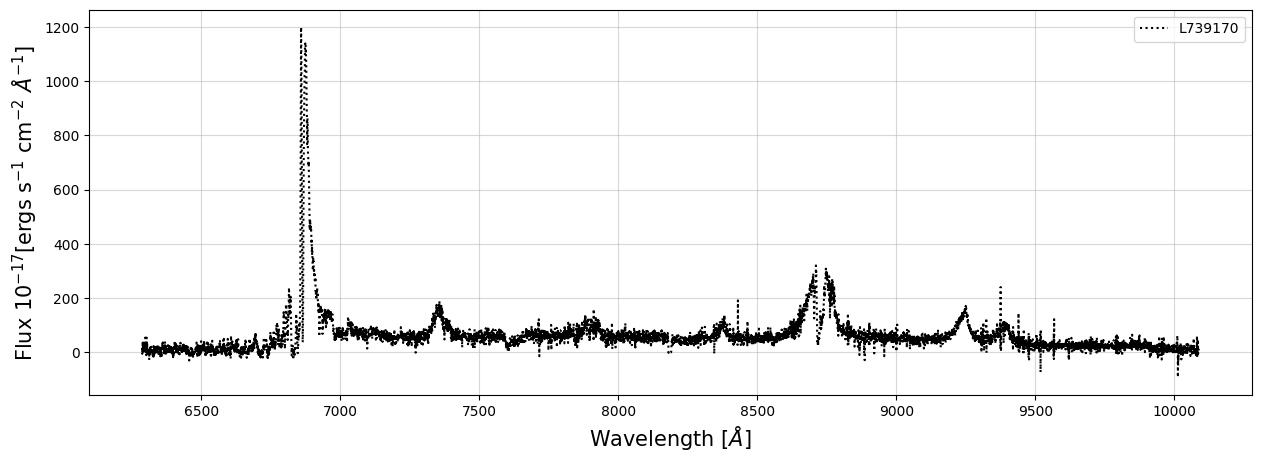

In [16]:
i=ids.pop()
print(i)
gid = sample.ID[i]
qf = sample.Qf[i]

print('We are examining galaxy',gid,'QF:',qf)


# filename of the galaxy
fname = sample[sample['ID']==gid]['fits1d'].values[0]

# 1d fits file of the galaxy
fits_1d = fits.open(fname)

# pulling out the wavelength and flux of the galaxy
wavelength = fits_1d[1].data['LAMBDA'][0]   # units of angstrom
flux = fits_1d[1].data['FLUX'][0]    # units of ergs/(s * cm^2 * A)

# closing the fits file
fits_1d.close()

# creating a spectral plot of the galaxy
plt.figure(figsize=[15,5])

# plotting the spectrum
plt.errorbar(wavelength, flux, fmt=':', label=gid, c='black')

# making it look pretty
plt.ylabel(r'Flux 10$^{-17}$[ergs s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]', fontsize = 15)
plt.xlabel('Wavelength [$\AA$]', fontsize = 15)
plt.grid(alpha = 0.5)
plt.legend()

plt.show()

In [ ]:
#sample.to_csv('raw_sample_cat.csv')